In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [5]:
#reading dataset into dataframe

df=pd.read_csv("student_scores - student_scores.csv")
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


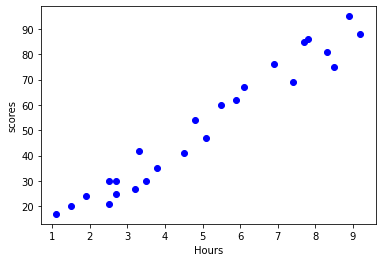

In [13]:
#plotting hours vs score 

plt.scatter(df.Hours, df.Scores,  color='blue')
plt.xlabel("Hours")
plt.ylabel("scores")
plt.show()

In [14]:
#dividing data in train and test df in ratio of 80 to 20

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [19]:
#Importing linear Regression model 

from sklearn import linear_model
reg_model= linear_model.LinearRegression()


In [20]:
#fitting the model

train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])
reg_model.fit (train_x, train_y)


LinearRegression()

Text(0, 0.5, 'Scores')

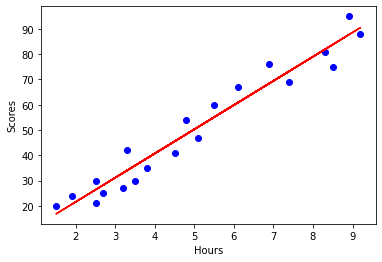

In [25]:
#plotting best fit line on the data

plt.scatter(train.Hours, train.Scores,  color='blue')
plt.plot(train_x, reg_model.coef_[0][0]*train_x + reg_model.intercept_[0], '-r')
plt.xlabel("Hours")
plt.ylabel("Scores")

In [32]:
#predicting the score for 9.25 hours

print("score of student who studies 9.25 hours a day",reg_model.predict([[9.25]]))

score of student who studies 9.25 hours a day [[90.96749493]]


In [42]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])
test_y_hat = reg_model.predict(test_x)



In [43]:
#checking efficiency of model

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 5.32
Residual sum of squares (MSE): 37.29
R2-score: 0.94
